# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

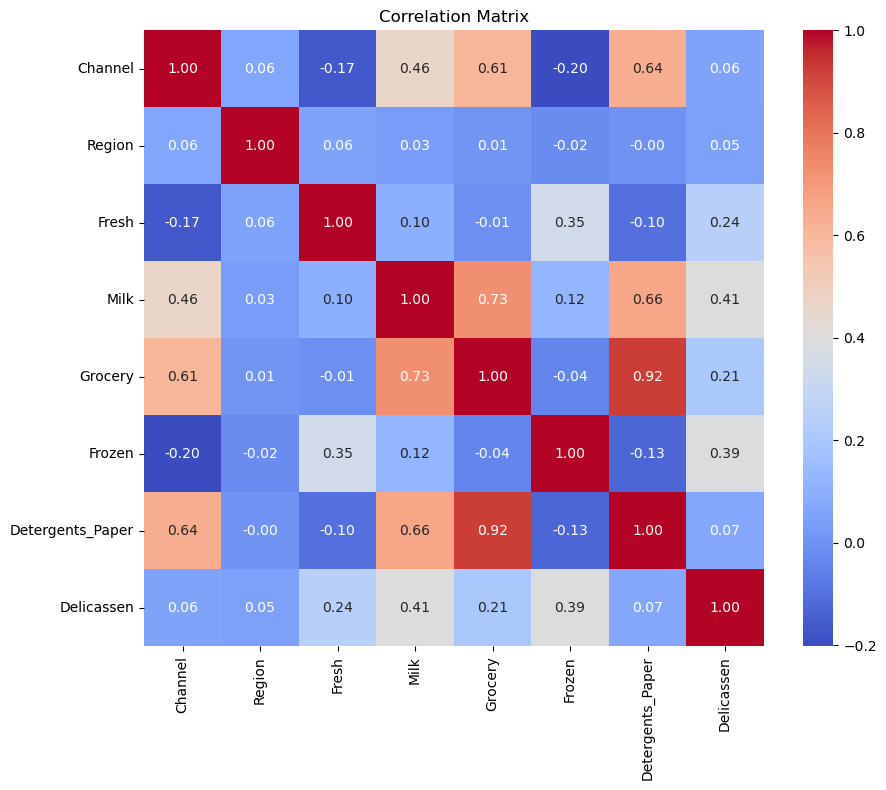

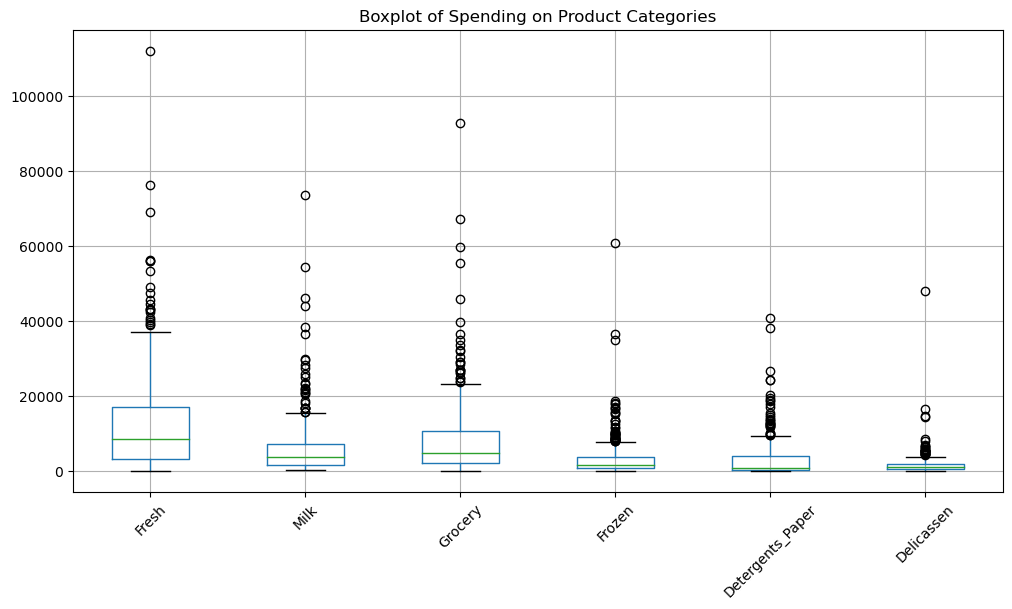

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

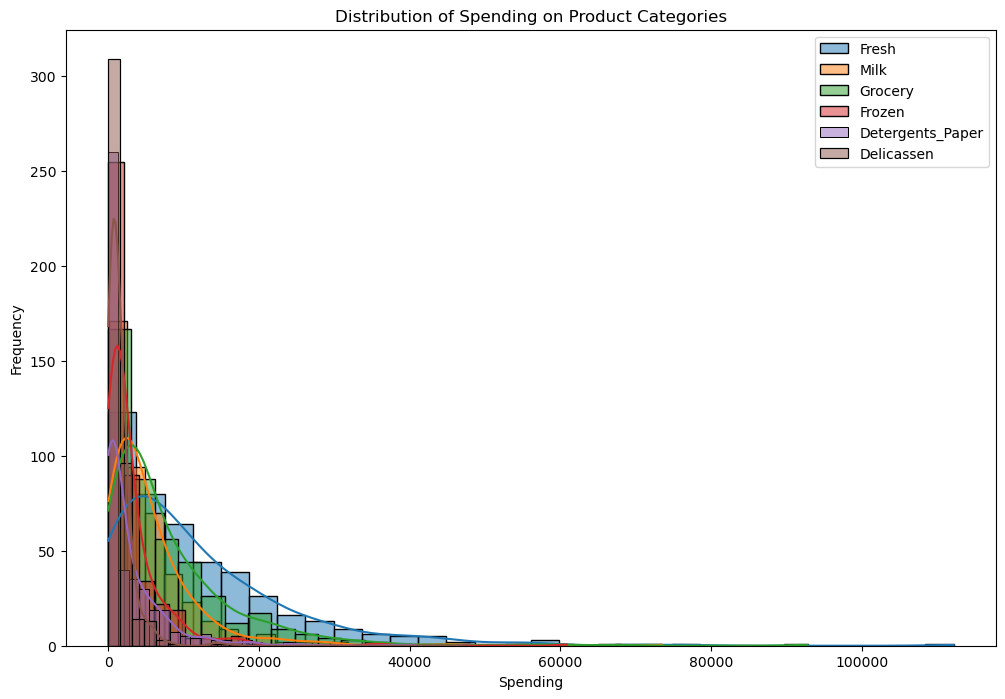

Total spending in the dataset: $14619500
Total spending by top 20% customers: $6272473
Percentage of total spending by top 20% customers: 42.90%


In [4]:
# Your code here
print(customers.head())
print(customers.info())

customers['Channel'] = customers['Channel'].astype('category')
customers['Region'] = customers['Region'].astype('category')

print(customers.isnull().sum())

correlation_matrix = customers.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualize outliers using boxplots for each category
plt.figure(figsize=(12, 6))
customers.boxplot()
plt.title('Boxplot of Spending on Product Categories')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of spending on each product category
plt.figure(figsize=(12, 8))
for column in customers.columns[2:]:
    sns.histplot(customers[column], kde=True, bins=30, alpha=0.5, label=column)

plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Spending on Product Categories')
plt.legend()
plt.show()

# Calculate total spending across all categories for each customer
customers['Total_Spending'] = customers.iloc[:, 2:].sum(axis=1)

# Sort customers by total spending in descending order
customers = customers.sort_values('Total_Spending', ascending=False)

# Calculate the cumulative sum of total spending
customers['Cumulative_Spending'] = customers['Total_Spending'].cumsum()

# Calculate the total spending in the dataset
total_spending = customers['Total_Spending'].sum()

# Identify the top 20% of customers
top_20_percent = int(0.2 * len(customers))

# Calculate the combined spending of the top 20%
top_20_spending = customers['Cumulative_Spending'].iloc[top_20_percent - 1]

# Check if the top 20% spending meets the 80% threshold
pareto_percentage = (top_20_spending / total_spending) * 100

print(f"Total spending in the dataset: ${total_spending}")
print(f"Total spending by top 20% customers: ${top_20_spending}")
print(f"Percentage of total spending by top 20% customers: {pareto_percentage:.2f}%")

In [5]:
# Your observations here
"""
Categorical Data: The dataset includes information about customer spending across different product categories, categorized by 'Channel' and 'Region'.

Correlation Analysis: Some notable correlations were observed, particularly between 'Grocery' and 'Detergents_Paper', suggesting potential co-linearity between these categories.

Descriptive Statistics and Outliers: Variations in the mean and standard deviation across product categories. Outliers were identified in several categories.

Data Distribution: 'Grocery', 'Milk', and 'Detergents_Paper' exhibited relatively higher frequencies in lower spending ranges.

Pareto Principle Analysis: Suggests a concentration of high-spending customers influencing a significant portion of total sales.
"""

"\nCategorical Data: The dataset includes information about customer spending across different product categories, categorized by 'Channel' and 'Region'.\n\nCorrelation Analysis: Some notable correlations were observed, particularly between 'Grocery' and 'Detergents_Paper', suggesting potential co-linearity between these categories.\n\nDescriptive Statistics and Outliers: Variations in the mean and standard deviation across product categories. Outliers were identified in several categories.\n\nData Distribution: 'Grocery', 'Milk', and 'Detergents_Paper' exhibited relatively higher frequencies in lower spending ranges.\n\nPareto Principle Analysis: Suggests a concentration of high-spending customers influencing a significant portion of total sales.\n"

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [6]:
# Your code here
# Convert 'Channel' and 'Region' columns to categorical if necessary
customers['Channel'] = customers['Channel'].astype('category')
customers['Region'] = customers['Region'].astype('category')

In [7]:
# Your comment here
"""
No missing values were found in the dataset.
"""

'\nNo missing values were found in the dataset.\n'

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [8]:
# Your import here:
from sklearn.preprocessing import StandardScaler
# Your code here:
# Extracting numerical columns for scaling
numerical_columns = customers.drop(['Channel', 'Region'], axis=1)  # Exclude categorical columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

columns = numerical_columns.columns  # Get the column names
customers_scale = pd.DataFrame(scaled_data, columns=columns)

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [9]:
# Your code here:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(customers_scale)

cluster_labels = kmeans.labels_
customers['labels'] = cluster_labels

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Count the values in `labels`.

In [10]:
# Your code here:
label_counts = customers['labels'].value_counts()
label_counts

labels
3    252
1     89
4     85
2     10
0      4
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [11]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)
dbscan_labels = dbscan.labels_

customers['labels_DBSCAN'] = dbscan_labels


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Count the values in `labels_DBSCAN`.

In [12]:
# Your code here
scan_dbs = customers['labels_DBSCAN'].value_counts()
scan_dbs

labels_DBSCAN
-1    214
 0    190
 5     15
 2      6
 1      5
 4      5
 3      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

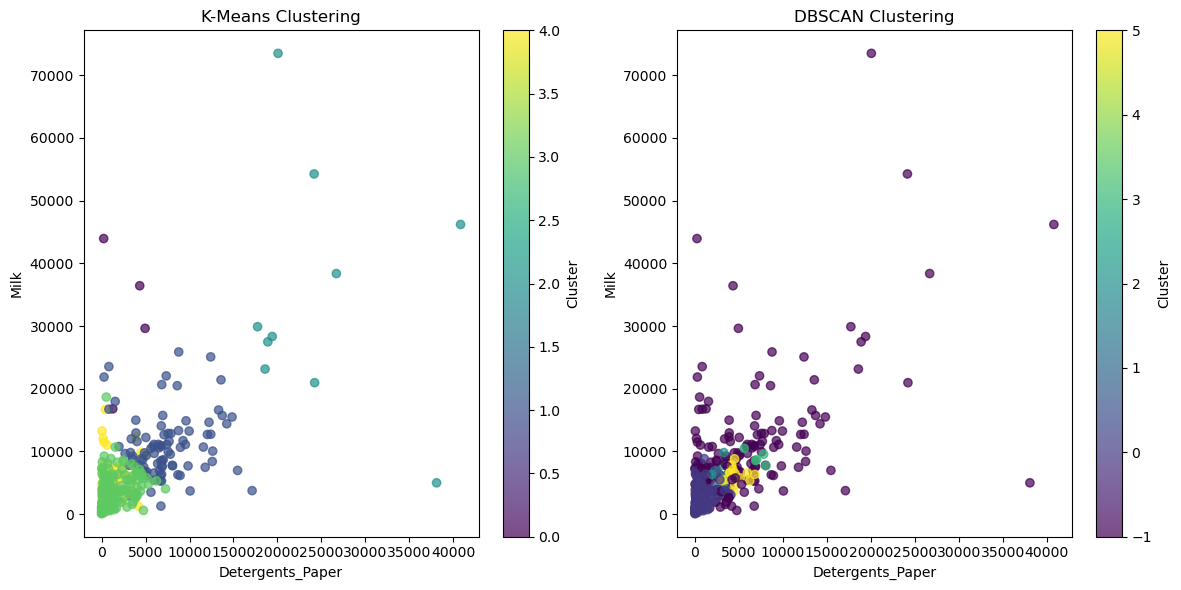

In [13]:
# Your code here:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

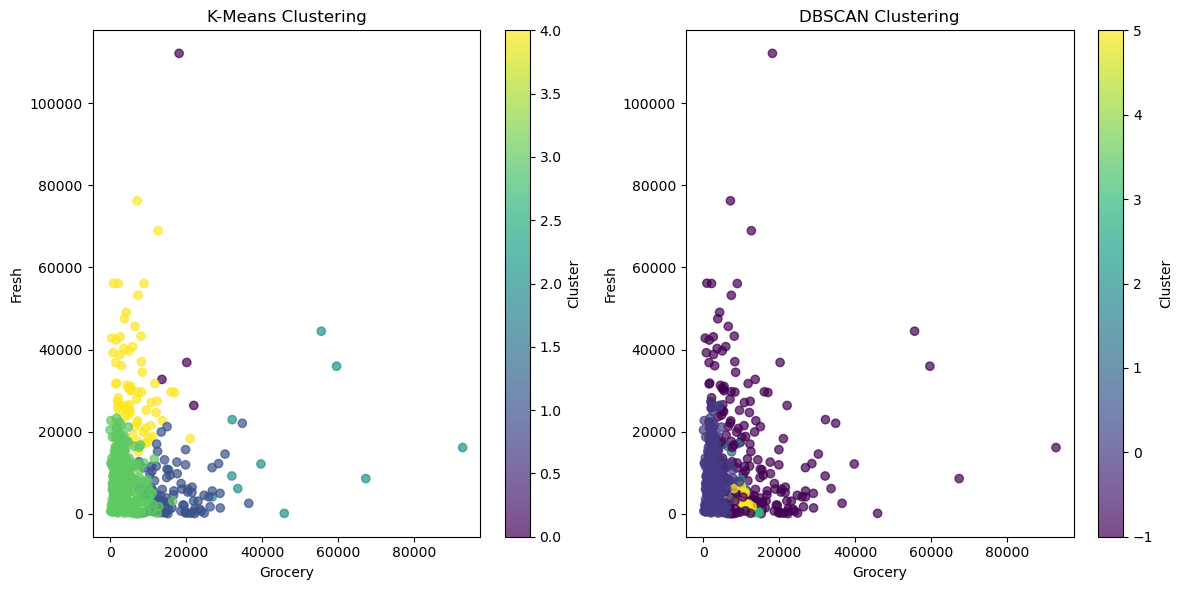

In [14]:
# Your code here:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

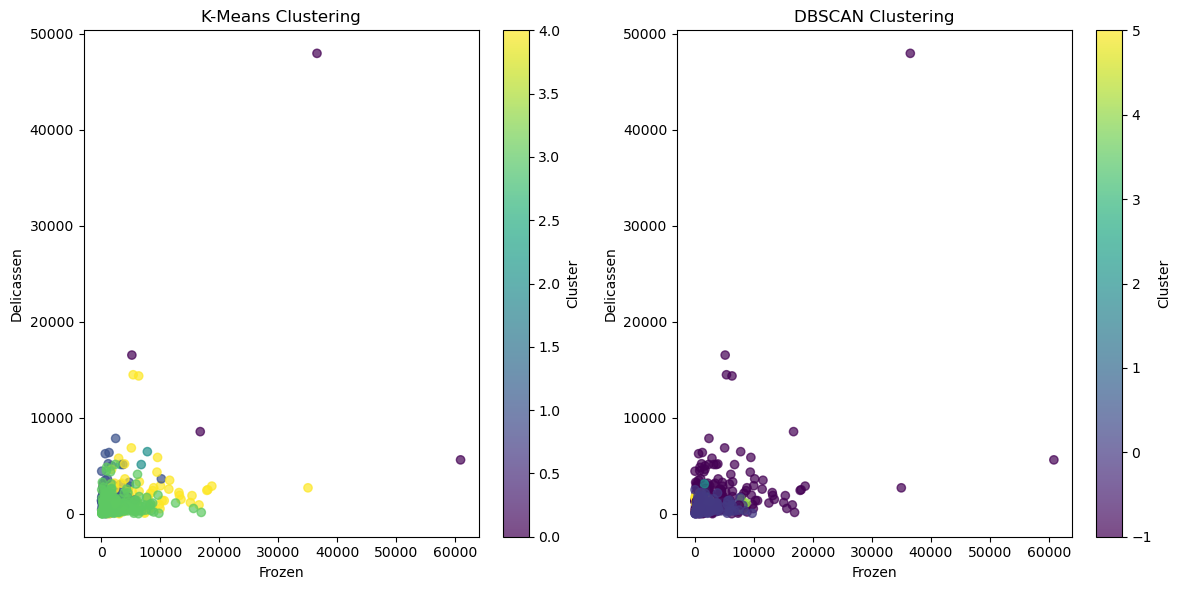

In [15]:
# Your code here:
# Your code here:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [17]:
# Your code here:
# Exclude categorical columns for mean calculation
numerical_columns = customers.drop(['Channel', 'Region', 'labels', 'labels_DBSCAN'], axis=1)

# Group by 'labels' and calculate the means for numerical columns
kmeans_means = numerical_columns.groupby(customers['labels']).mean()

# Group by 'labels_DBSCAN' and calculate the means for numerical columns
dbscan_means = numerical_columns.groupby(customers['labels_DBSCAN']).mean()

# Display the means for K-Means clustering
print("Means for K-Means Clustering:")
print(kmeans_means)

# Display the means for DBSCAN clustering
print("\nMeans for DBSCAN Clustering:")
print(dbscan_means)

Means for K-Means Clustering:
               Fresh          Milk       Grocery        Frozen  \
labels                                                           
0       52022.000000  31696.000000  18490.750000  29825.500000   
1        5659.808989  10921.426966  16846.561798   1472.820225   
2       15964.900000  34708.500000  48536.900000   3054.600000   
3        7804.670635   2840.682540   3756.007937   2267.690476   
4       28728.164706   4572.105882   5804.376471   5873.682353   

        Detergents_Paper    Delicassen  Total_Spending  Cumulative_Spending  
labels                                                                       
0            2699.000000  19656.250000   154389.500000         1.003444e+06  
1            7299.426966   1606.314607    43806.359551         7.029795e+06  
2           24875.200000   2942.800000   130082.900000         1.355108e+06  
3            1057.571429    906.027778    18632.650794         1.277303e+07  
4            1084.141176   2254.223529 

Which algorithm appears to perform better?

In [ ]:
# Your observations here
"""
I would lean toward DBSCAN's adaptability and robustness in capturing diverse cluster shapes and densities, 
especially in scenarios where the structure of the data might not be explicitly clear or doesn’t conform
to assumptions like spherical clusters. 
"""

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here